In [138]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime as dt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.utils import resample
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,BaggingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,HistGradientBoostingRegressor
from sklearn import metrics
from sklearn.metrics import *

import pickle
import warnings
warnings.filterwarnings('ignore')

In [139]:
rain = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
rain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


**Problem Statement:**
        
                                Rain Prediction – Weather forecasting
    Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

In [140]:
rain.shape

(8425, 23)

Shape of Dataset 8425,23

In [141]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

**Information of Dataset:**
- RangeIndex: 0 to 8424
- Total Columns: 23
- dtypes: float64(16), object(7)

In [142]:
rain.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


**Short description of our dataset.**
- Counts
- Mean
- Standard deviation
- Minimum
- 1st quantile
- 2nd quantile
- 3rd quantile
- Maximum value of each columns.

**- Data Cleaning.**

In [143]:
rain.isna().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

There are many Null Values present in our dataset.

## Filling Null Values.

**- Filling with mean.**

In [144]:
rain['MinTemp'] = rain['MinTemp'].fillna(rain['MinTemp'].mean())
rain['MaxTemp'] = rain['MaxTemp'].fillna(rain['MaxTemp'].mean())
rain['Rainfall'] = rain['Rainfall'].fillna(rain['Rainfall'].mean())
rain['Evaporation'] = rain['Evaporation'].fillna(rain['Evaporation'].mean())
rain['WindGustSpeed'] = rain['WindGustSpeed'].fillna(rain['WindGustSpeed'].mean())
rain['WindSpeed9am'] = rain['WindSpeed9am'].fillna(rain['WindSpeed9am'].mean())
rain['WindSpeed3pm'] = rain['WindSpeed3pm'].fillna(rain['WindSpeed3pm'].mean())
rain['Humidity9am'] = rain['Humidity9am'].fillna(rain['Humidity9am'].mean())
rain['Humidity3pm'] = rain['Humidity3pm'].fillna(rain['Humidity3pm'].mean())
rain['Pressure9am'] = rain['Pressure9am'].fillna(rain['Pressure9am'].mean())
rain['Pressure3pm'] = rain['Pressure3pm'].fillna(rain['Pressure3pm'].mean())
rain['Temp9am'] = rain['Temp9am'].fillna(rain['Temp9am'].mean())
rain['Temp3pm'] = rain['Temp3pm'].fillna(rain['Temp3pm'].mean())

**- Filling with median.**

In [145]:
rain['Sunshine'] = rain['Sunshine'].fillna(rain['Sunshine'].median())
rain['Cloud9am'] = rain['Cloud9am'].fillna(rain['Cloud9am'].median())
rain['Cloud3pm'] = rain['Cloud3pm'].fillna(rain['Cloud3pm'].median())

**- Filling with mode.**

In [146]:
rain['WindGustDir'] = rain['WindGustDir'].fillna(rain['WindGustDir'].mode()[0])
rain['WindDir9am'] = rain['WindDir9am'].fillna(rain['WindDir9am'].mode()[0])
rain['WindDir3pm'] = rain['WindDir3pm'].fillna(rain['WindDir3pm'].mode()[0])
rain['RainToday'] = rain['RainToday'].fillna(rain['RainToday'].mode()[0])
rain['RainTomorrow'] = rain['RainTomorrow'].fillna(rain['RainTomorrow'].mode()[0])

In [147]:
rain.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

There are no null values present in our dataset.

**- Converting the date column to Datetime.**

In [148]:
rain['Date'] = pd.to_datetime(rain['Date'])

## Visualization:

In [149]:
def plot(x,y,data):
    plt.figure()
    plt.scatter(x,y,data=rain)
    plt.xlabel(x)
    plt.ylabel(y)
    print('Scatterpot between',x,'and',y)
    plt.show()

**- Bivariate Analysis.**

Scatterpot between RainTomorrow and Location


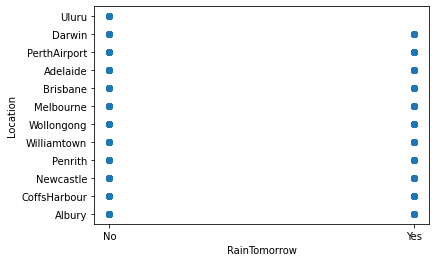

In [150]:
plot(y = 'Location', x = 'RainTomorrow', data = rain)

Scatterpot between Rainfall and Location


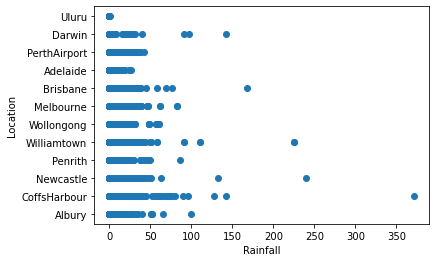

In [138]:
plot(y = 'Location', x = 'Rainfall', data = rain)

Scatterpot between Rainfall and MinTemp


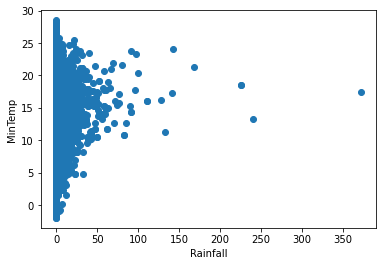

In [142]:
plot(y = 'MinTemp', x = 'Rainfall', data = rain)

Scatterpot between RainTomorrow and Sunshine


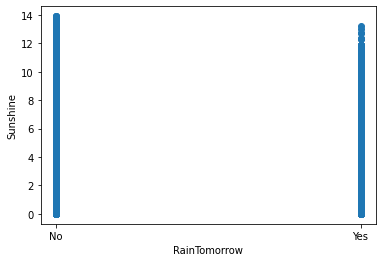

In [144]:
plot(y = 'Sunshine', x = 'RainTomorrow', data = rain)

<AxesSubplot:xlabel='Rainfall', ylabel='Humidity3am'>

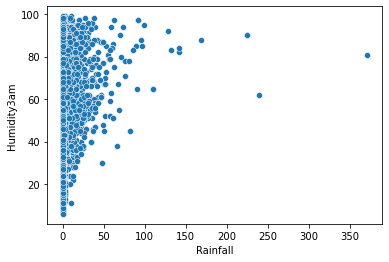

In [81]:
sns.scatterplot(x = 'Rainfall', y = 'Humidity3am', data = rain)

**- Univariate Analysis.**

<AxesSubplot:xlabel='Date', ylabel='count'>

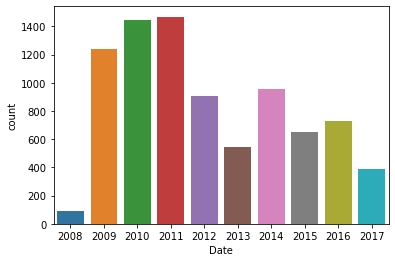

In [105]:
sns.countplot(rain['Date'].dt.year)

## Pairplot:

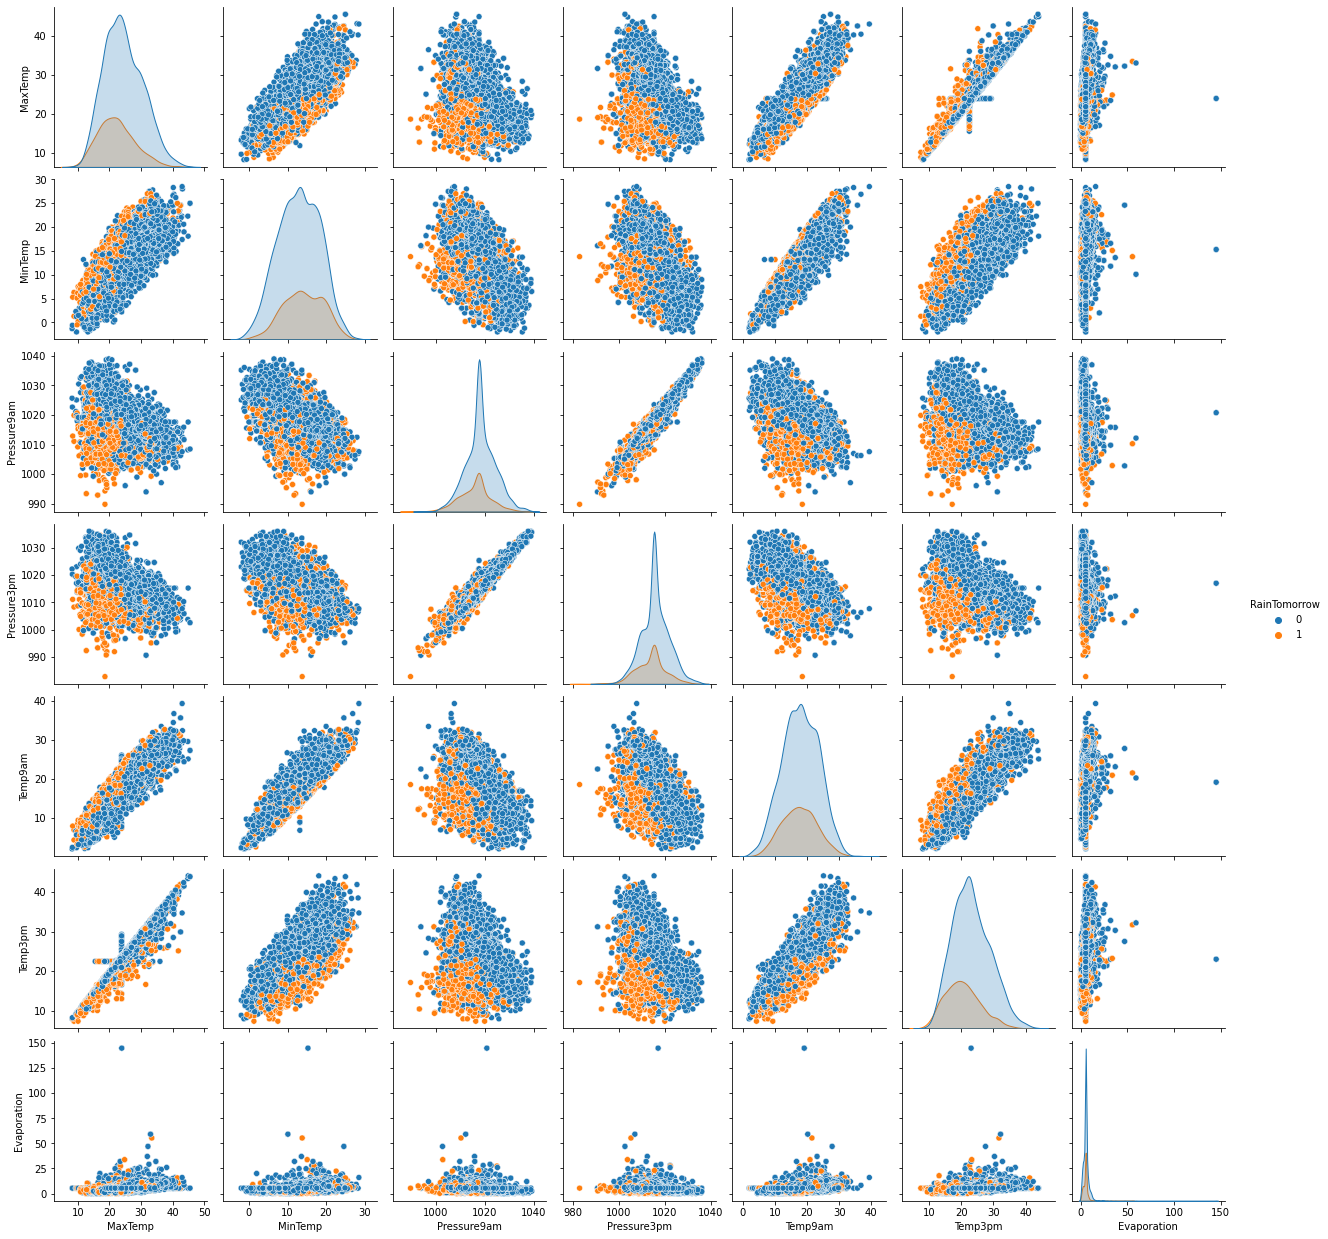

In [34]:
sns.pairplot(data=rain, 
             vars=('MaxTemp','MinTemp','Pressure9am','Pressure3pm', 'Temp9am', 'Temp3pm', 'Evaporation'), 
             hue='RainTomorrow' )

## Encoding

In [151]:
lb = LabelEncoder()
rain['Location'] = lb.fit_transform(rain['Location'])
rain['WindGustDir'] = lb.fit_transform(rain['WindGustDir'])
rain['WindDir9am'] = lb.fit_transform(rain['WindDir9am'])
rain['WindDir3pm'] = lb.fit_transform(rain['WindDir3pm'])
rain['RainToday'] = lb.fit_transform(rain['RainToday'])
rain['RainTomorrow'] = lb.fit_transform(rain['RainTomorrow'])

## Imbalanced Target Column.

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

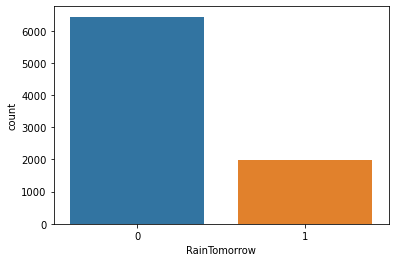

In [152]:
sns.countplot(rain['RainTomorrow'])

In [153]:
no = rain[rain.RainTomorrow == 0]
yes = rain[rain.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
os = pd.concat([no, yes_oversampled])

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

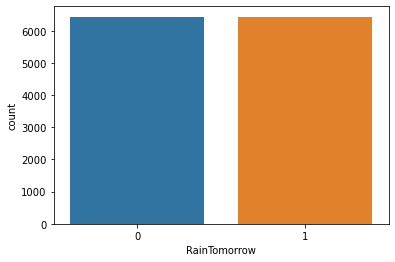

In [154]:
sns.countplot(os['RainTomorrow'])

In [155]:
os

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,1,13.4,22.9,0.6,5.389395,8.7,13,44.000000,13,...,71.0,22.0,1007.700000,1007.100000,8.0,5.0,16.9,21.8,0,0
1,2008-12-02,1,7.4,25.1,0.0,5.389395,8.7,14,44.000000,6,...,44.0,25.0,1010.600000,1007.800000,5.0,5.0,17.2,24.3,0,0
2,2008-12-03,1,12.9,25.7,0.0,5.389395,8.7,15,46.000000,13,...,38.0,30.0,1007.600000,1008.700000,5.0,2.0,21.0,23.2,0,0
3,2008-12-04,1,9.2,28.0,0.0,5.389395,8.7,4,24.000000,9,...,45.0,16.0,1017.600000,1012.800000,5.0,5.0,18.1,26.5,0,0
4,2008-12-05,1,17.5,32.3,1.0,5.389395,8.7,13,41.000000,1,...,82.0,33.0,1010.800000,1006.000000,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1840,2014-04-27,6,15.0,19.2,12.0,5.389395,8.7,3,40.174469,3,...,95.0,92.0,1017.640233,1015.236075,8.0,8.0,18.0,18.2,1,1
7480,2012-06-28,8,10.4,18.1,1.2,3.200000,4.8,12,44.000000,5,...,82.0,62.0,1022.700000,1021.900000,5.0,4.0,14.0,16.6,1,1
7569,2012-09-25,8,11.9,20.4,8.2,3.800000,7.8,14,70.000000,13,...,64.0,78.0,1007.000000,1006.600000,6.0,7.0,19.1,16.3,1,1
5679,2010-09-18,5,10.1,17.0,0.0,2.200000,2.9,12,44.000000,15,...,77.0,64.0,1021.300000,1019.800000,5.0,5.0,10.8,13.8,0,1


Final Dataset.

## Correlation:

In [156]:
df = os.corr()

<AxesSubplot:>

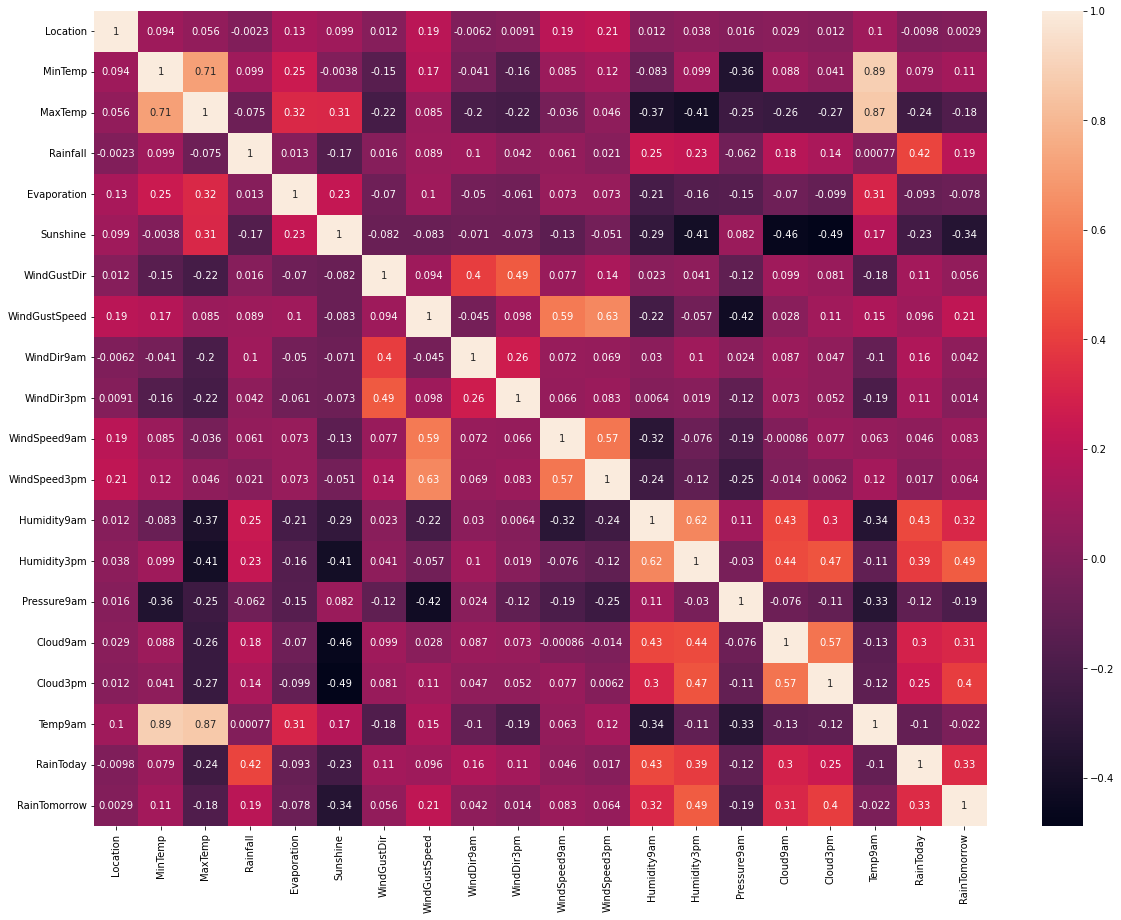

In [128]:
plt.figure(figsize = (20,15))
sns.heatmap(df,annot = True)

Found that:
1. MaxTemp & Temp3pm are correlated columns.
2. Pressure9am & Pressure3pm are correlated columns.
    
        So, Removing the one of the columns and only for those who have more than 90% multicolinearity.

In [157]:
os.drop(columns = ['Pressure3pm','Temp3pm'],inplace = True)

## Feature Selection

**- Seperating Features & Target Columns.**

In [158]:
x = os.drop(columns = ['Date','RainTomorrow'],axis = 1)
y = os.RainTomorrow

In [159]:
best_feature = SelectKBest(score_func = f_classif, k =18)
fit = best_feature.fit(x,y)

In [160]:
brt_score = pd.DataFrame(fit.scores_)
brt_column = pd.DataFrame(x.columns)

In [161]:
feature_score = pd.concat([brt_column,brt_score], axis = 1)
feature_score.columns = ['Feature Name','Scores']
feature_score.nlargest(18,'Scores')

,Feature Name,Scores
13,Humidity3pm,4139.922022
16,Cloud3pm,2400.538596
5,Sunshine,1659.997889
18,RainToday,1608.932120
12,Humidity9am,1427.348769
15,Cloud9am,1411.290981
7,WindGustSpeed,620.606066
3,Rainfall,493.214684
14,Pressure9am,490.378010
2,MaxTemp,416.285274


Features & Scores.

## Model Building.

**- Standard Scaler.**

In [162]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [163]:
x_scaled

array([[-1.51486444, -0.02105647, -0.06844593, ..., -0.050383  ,
        -0.14790386, -0.68198463],
       [-1.51486444, -1.14645214,  0.29646509, ..., -0.050383  ,
        -0.09346688, -0.68198463],
       [-1.51486444, -0.11483944,  0.39598628, ..., -1.38347769,
         0.5960683 , -0.68198463],
       ...,
       [ 0.69525751, -0.30240539, -0.48311754, ...,  0.8383468 ,
         0.25130071,  1.4663087 ],
       [-0.25193761, -0.64002409, -1.04707094, ..., -0.050383  ,
        -1.25478928, -0.68198463],
       [-0.25193761,  0.95428645,  0.42916001, ...,  1.28271169,
         0.28759204,  1.4663087 ]])

**- Train Test Split.**

In [164]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 9)

**- Function for Training & Testing.**

In [165]:
def score(clas, x_train, x_test, y_train, y_test, train = True):
    if train:
        y_pred = clas.predict(x_train)
        print('\n ----- Train Result ----- \n')
        print('Accuracy Score:', accuracy_score(y_train,y_pred))
        print('\n ----- Classification Report ----- \n', classification_report(y_train,y_pred))
        print('\n ----- Confusion matrix ----- \n', confusion_matrix(y_train,y_pred))
    
    elif train == False:
        pred = clas.predict(x_test)
        print('\n ----- Test Result ----- \n')
        print('Accuracy Score:', accuracy_score(y_test,pred))
        print('\n ----- Classification Report ----- \n', classification_report(y_test,pred))
        print('\n ----- Confusion matrix ----- \n', confusion_matrix(y_test,pred))
        print('\n ----- Roc Curve ----- \n')
        plot_roc_curve(clas, x_test, y_test) 

**- Model Instantiating.**

In [166]:
knn = KNeighborsClassifier()
lr = LogisticRegression()
ada = AdaBoostClassifier()
rf = RandomForestClassifier()

**- KNeighbors Classifier.**


 ----- Train Result ----- 

Accuracy Score: 0.8993886643871102

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.95      0.85      0.90      4884
           1       0.86      0.95      0.90      4767

    accuracy                           0.90      9651
   macro avg       0.90      0.90      0.90      9651
weighted avg       0.90      0.90      0.90      9651


 ----- Confusion matrix ----- 
 [[4147  737]
 [ 234 4533]]

 ----- Test Result ----- 

Accuracy Score: 0.8476841778054087

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.89      0.78      0.83      1550
           1       0.82      0.91      0.86      1667

    accuracy                           0.85      3217
   macro avg       0.85      0.85      0.85      3217
weighted avg       0.85      0.85      0.85      3217


 ----- Confusion matrix ----- 
 [[1207  343]
 [ 147 1520]]

 ----- Roc Curve -----

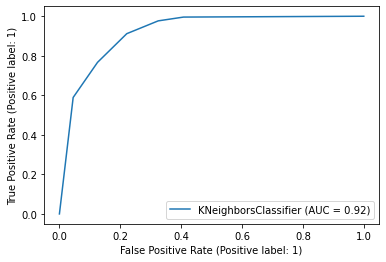

In [167]:
knn.fit(x_train,y_train)
score(knn, x_train,x_test,y_train,y_test,train = True)
score(knn, x_train,x_test,y_train,y_test,train = False)

**- Linear Regression.**


 ----- Train Result ----- 

Accuracy Score: 0.7645839809346182

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.75      0.80      0.77      4884
           1       0.78      0.73      0.75      4767

    accuracy                           0.76      9651
   macro avg       0.77      0.76      0.76      9651
weighted avg       0.77      0.76      0.76      9651


 ----- Confusion matrix ----- 
 [[3883 1001]
 [1271 3496]]

 ----- Test Result ----- 

Accuracy Score: 0.7569163817221013

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.73      0.78      0.76      1550
           1       0.78      0.73      0.76      1667

    accuracy                           0.76      3217
   macro avg       0.76      0.76      0.76      3217
weighted avg       0.76      0.76      0.76      3217


 ----- Confusion matrix ----- 
 [[1211  339]
 [ 443 1224]]

 ----- Roc Curve -----

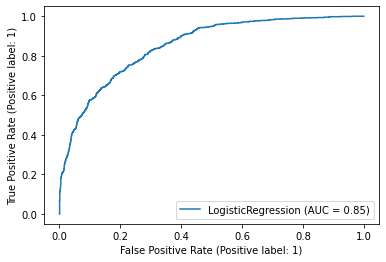

In [168]:
lr.fit(x_train,y_train)
score(lr, x_train,x_test,y_train,y_test,train = True)
score(lr, x_train,x_test,y_train,y_test,train = False)

**- AdaBoost Classifier.**


 ----- Train Result ----- 

Accuracy Score: 0.7795047145373536

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.77      0.81      0.79      4884
           1       0.79      0.75      0.77      4767

    accuracy                           0.78      9651
   macro avg       0.78      0.78      0.78      9651
weighted avg       0.78      0.78      0.78      9651


 ----- Confusion matrix ----- 
 [[3958  926]
 [1202 3565]]

 ----- Test Result ----- 

Accuracy Score: 0.7603357165060616

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.73      0.79      0.76      1550
           1       0.79      0.74      0.76      1667

    accuracy                           0.76      3217
   macro avg       0.76      0.76      0.76      3217
weighted avg       0.76      0.76      0.76      3217


 ----- Confusion matrix ----- 
 [[1219  331]
 [ 440 1227]]

 ----- Roc Curve -----

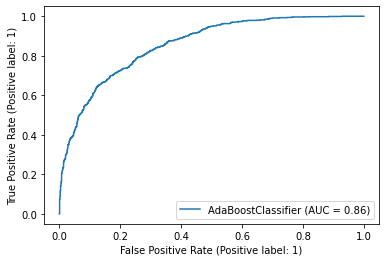

In [169]:
ada.fit(x_train,y_train)
score(ada, x_train,x_test,y_train,y_test,train = True)
score(ada, x_train,x_test,y_train,y_test,train = False)

**- RandomForest Classifier.**


 ----- Train Result ----- 

Accuracy Score: 0.9995855351777018

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4884
           1       1.00      1.00      1.00      4767

    accuracy                           1.00      9651
   macro avg       1.00      1.00      1.00      9651
weighted avg       1.00      1.00      1.00      9651


 ----- Confusion matrix ----- 
 [[4884    0]
 [   4 4763]]

 ----- Test Result ----- 

Accuracy Score: 0.964874106310227

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.98      0.95      0.96      1550
           1       0.95      0.98      0.97      1667

    accuracy                           0.96      3217
   macro avg       0.97      0.96      0.96      3217
weighted avg       0.97      0.96      0.96      3217


 ----- Confusion matrix ----- 
 [[1470   80]
 [  33 1634]]

 ----- Roc Curve ----- 

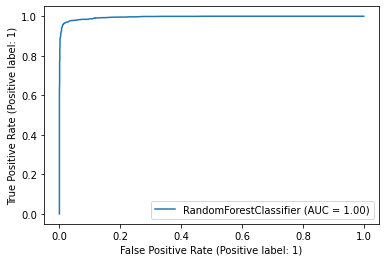

In [170]:
rf.fit(x_train,y_train)
score(rf, x_train,x_test,y_train,y_test,train = True)
score(rf, x_train,x_test,y_train,y_test,train = False)

            RandomForest Classifier, is giving the best accuracy score.

**Saving the Model.**

In [171]:
filename = 'rainfall_classi.pickle'
pickle.dump(rf, open(filename, 'wb'))

## Regression

In [172]:
os

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,Temp9am,RainToday,RainTomorrow
0,2008-12-01,1,13.4,22.9,0.6,5.389395,8.7,13,44.000000,13,...,20.0,24.0,71.0,22.0,1007.700000,8.0,5.0,16.9,0,0
1,2008-12-02,1,7.4,25.1,0.0,5.389395,8.7,14,44.000000,6,...,4.0,22.0,44.0,25.0,1010.600000,5.0,5.0,17.2,0,0
2,2008-12-03,1,12.9,25.7,0.0,5.389395,8.7,15,46.000000,13,...,19.0,26.0,38.0,30.0,1007.600000,5.0,2.0,21.0,0,0
3,2008-12-04,1,9.2,28.0,0.0,5.389395,8.7,4,24.000000,9,...,11.0,9.0,45.0,16.0,1017.600000,5.0,5.0,18.1,0,0
4,2008-12-05,1,17.5,32.3,1.0,5.389395,8.7,13,41.000000,1,...,7.0,20.0,82.0,33.0,1010.800000,7.0,8.0,17.8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1840,2014-04-27,6,15.0,19.2,12.0,5.389395,8.7,3,40.174469,3,...,0.0,0.0,95.0,92.0,1017.640233,8.0,8.0,18.0,1,1
7480,2012-06-28,8,10.4,18.1,1.2,3.200000,4.8,12,44.000000,5,...,9.0,17.0,82.0,62.0,1022.700000,5.0,4.0,14.0,1,1
7569,2012-09-25,8,11.9,20.4,8.2,3.800000,7.8,14,70.000000,13,...,30.0,24.0,64.0,78.0,1007.000000,6.0,7.0,19.1,1,1
5679,2010-09-18,5,10.1,17.0,0.0,2.200000,2.9,12,44.000000,15,...,17.0,24.0,77.0,64.0,1021.300000,5.0,5.0,10.8,0,1


Final Dataset.

In [113]:
os.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'RainToday',
       'RainTomorrow'],
      dtype='object')

## Model Building.

**- Seperating Features & Target columns.**

In [114]:
x = os.drop(columns = ['Date','Rainfall'],axis = 1)
y = os.Rainfall

**- StandardScaler.**

In [115]:
x_scale = scaler.fit_transform(x)

**- Train Test Split.**

In [116]:
x_train,x_test,y_train,y_test = train_test_split(x_scale, y, test_size = 0.25, random_state = 9)

**- Function for Training & Testing.**

In [117]:
def score(clas, x_train, x_test, y_train, y_test, train = True):
    if train:
        y_pred = clas.predict(x_train)
        print('\n ----- Train Result ----- \n')
        print('Accuracy Score:', metrics.r2_score(y_train,y_pred))
    
    elif train == False:
        pred = clas.predict(x_test)
        print('\n ----- Test Result ----- \n')
        print('Accuracy Score:', metrics.r2_score(y_test,pred))
        print('\n ----- Model Evaluation ----- \n')
        print('Mean Absolute Percentage Error:',mean_absolute_percentage_error(y_test,pred))
        print('\n')
        plt.scatter(y_test,pred)
        plt.xlabel("Actual")
        plt.ylabel("Predicted")
        plt.title("Actual VS Prediction")
        plt.show()

**- Model Instantiating.**

In [118]:
lr_reg = LinearRegression()
ada_reg = AdaBoostRegressor()
rf_reg = RandomForestRegressor()
hist_reg = HistGradientBoostingRegressor()

**- AdaBoost Regressor.**


 ----- Train Result ----- 

Accuracy Score: -1.6875782902311185

 ----- Test Result ----- 

Accuracy Score: -3.9855459355202125

 ----- Model Evaluation ----- 

Mean Absolute Percentage Error: 4.341585884097108e+16




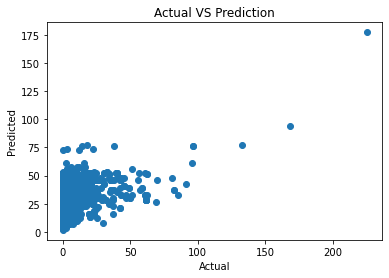

In [119]:
ada_reg.fit(x_train,y_train)
score(ada_reg, x_train,x_test,y_train,y_test,train = True)
score(ada_reg, x_train,x_test,y_train,y_test,train = False)

**- Linear Regression.**


 ----- Train Result ----- 

Accuracy Score: 0.19761869084545325

 ----- Test Result ----- 

Accuracy Score: 0.27590912433500003

 ----- Model Evaluation ----- 

Mean Absolute Percentage Error: 4792430631395064.0




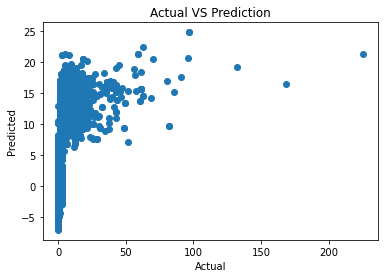

In [120]:
lr_reg.fit(x_train,y_train)
score(lr_reg, x_train,x_test,y_train,y_test,train = True)
score(lr_reg, x_train,x_test,y_train,y_test,train = False)

**- HistGradientBoosting Regressor.**


 ----- Train Result ----- 

Accuracy Score: 0.9418949693558092

 ----- Test Result ----- 

Accuracy Score: 0.7702111007204291

 ----- Model Evaluation ----- 

Mean Absolute Percentage Error: 948462839861016.9




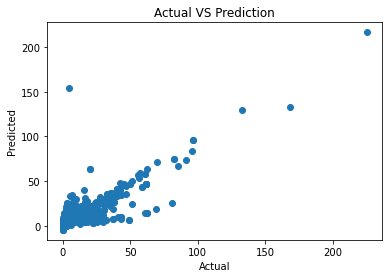

In [121]:
hist_reg.fit(x_train,y_train)
score(hist_reg, x_train,x_test,y_train,y_test,train = True)
score(hist_reg, x_train,x_test,y_train,y_test,train = False)

**- RandomForest Regressor.**


 ----- Train Result ----- 

Accuracy Score: 0.9875258729917664

 ----- Test Result ----- 

Accuracy Score: 0.8009035766233843

 ----- Model Evaluation ----- 

Mean Absolute Percentage Error: 179928409696080.22




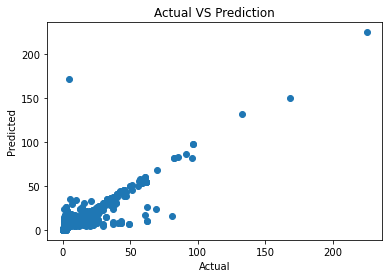

In [122]:
rf_reg.fit(x_train,y_train)
score(rf_reg, x_train,x_test,y_train,y_test,train = True)
score(rf_reg, x_train,x_test,y_train,y_test,train = False)

        RandomForest Regressor, is giving the best accuracy score for Regression.

**Saving the Model.**

In [173]:
filename = 'rain_reg.pickle'
pickle.dump(rf_reg, open(filename, 'wb'))